# Importar Librerias.

In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import plotly.express as px

# Carga de datos.

In [216]:
path = "/content/drive/MyDrive/Colab Notebooks/ML/DB/vehicles_sample_min.csv"
df = pd.read_csv(path)

In [217]:
# Primera vista.
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7315883828,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00s0s_lRS7etJoVE...,Carvana is the safer way to buy a car During t...,NaN,fl,28.0400,-81.9600,2021-05-02T15:31:06-0400
1,7314599643,https://quadcities.craigslist.org/ctd/d/waterl...,"quad cities, IA/IL",https://quadcities.craigslist.org,27995,2006.0,chevrolet,corvette,good,8 cylinders,...,NaN,convertible,black,https://images.craigslist.org/00101_aa4DyXpKu0...,2006 *** Chevrolet Corvette Convertible Conver...,NaN,il,42.4778,-92.3661,2021-04-29T18:46:35-0500
2,7308399808,https://littlerock.craigslist.org/ctd/d/clinto...,little rock,https://littlerock.craigslist.org,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,...,NaN,convertible,NaN,https://images.craigslist.org/00A0A_kJsL7mVMCg...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.4018,-93.7850,2021-04-17T14:01:33-0500
3,7312663807,https://wheeling.craigslist.org/ctd/d/follansb...,northern panhandle,https://wheeling.craigslist.org,14000,2013.0,bmw,328i,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00K0K_2oCjTKrjd9...,"**Deals, Deals, Deals** Beautiful 2013 BMW 3-S...",NaN,oh,40.3203,-80.6250,2021-04-25T23:53:42-0400
4,7315368523,https://eugene.craigslist.org/ctd/d/cottage-gr...,eugene,https://eugene.craigslist.org,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,...,NaN,NaN,black,https://images.craigslist.org/00H0H_3hFsa4lTxO...,2019 Chevrolet Suburban LS Brads Chevy - ☎️ ...,NaN,or,43.7839,-123.0529,2021-05-01T10:04:24-0700


# EDA.

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4988 non-null   float64
 6   manufacturer  4805 non-null   object 
 7   model         4940 non-null   object 
 8   condition     2953 non-null   object 
 9   cylinders     2946 non-null   object 
 10  fuel          4961 non-null   object 
 11  odometer      4943 non-null   float64
 12  title_status  4901 non-null   object 
 13  transmission  4973 non-null   object 
 14  VIN           3115 non-null   object 
 15  drive         3528 non-null   object 
 16  size          1420 non-null   object 
 17  type          3961 non-null   object 
 18  paint_color   3507 non-null 

In [219]:
# Cambiar - por _ en nombre de columnas
df.columns = df.columns.str.replace("-","_").str.strip()

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4988 non-null   float64
 6   manufacturer  4805 non-null   object 
 7   model         4940 non-null   object 
 8   condition     2953 non-null   object 
 9   cylinders     2946 non-null   object 
 10  fuel          4961 non-null   object 
 11  odometer      4943 non-null   float64
 12  title_status  4901 non-null   object 
 13  transmission  4973 non-null   object 
 14  VIN           3115 non-null   object 
 15  drive         3528 non-null   object 
 16  size          1420 non-null   object 
 17  type          3961 non-null   object 
 18  paint_color   3507 non-null 

In [221]:
# Eliminar columnas que no se consideran necesarias para la prediccion del precio.
df.drop(columns=['id','url', 'image_url', 'description', 'county', 'region_url', 'posting_date', 'lat', 'long', 'VIN','size'], inplace=True)

In [222]:
# Verificar cambios.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        5000 non-null   object 
 1   price         5000 non-null   int64  
 2   year          4988 non-null   float64
 3   manufacturer  4805 non-null   object 
 4   model         4940 non-null   object 
 5   condition     2953 non-null   object 
 6   cylinders     2946 non-null   object 
 7   fuel          4961 non-null   object 
 8   odometer      4943 non-null   float64
 9   title_status  4901 non-null   object 
 10  transmission  4973 non-null   object 
 11  drive         3528 non-null   object 
 12  type          3961 non-null   object 
 13  paint_color   3507 non-null   object 
 14  state         5000 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 586.1+ KB


In [223]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,lakeland,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,gas,38094.0,clean,other,4wd,pickup,white,fl
1,"quad cities, IA/IL",27995,2006.0,chevrolet,corvette,good,8 cylinders,gas,NaN,clean,manual,rwd,convertible,black,il
2,little rock,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,gas,30200.0,clean,automatic,rwd,convertible,NaN,ar
3,northern panhandle,14000,2013.0,bmw,328i,NaN,NaN,gas,92965.0,clean,automatic,NaN,NaN,NaN,oh
4,eugene,676,2019.0,chevrolet,suburban ls,NaN,8 cylinders,other,47105.0,clean,automatic,NaN,NaN,black,or


In [224]:
# Revisar nulls.
df.isnull().sum()

,0
region,0
price,0
year,12
manufacturer,195
model,60
condition,2047
cylinders,2054
fuel,39
odometer,57
title_status,99


# Imputar datos faltantes.

In [225]:
# LLenar null en columnas numericas
num_null = ["odometer","year"]
df[num_null] = df[num_null].apply(lambda x: x.fillna(x.mean()))


In [226]:
# Revisar nulls.
df.isnull().sum()

,0
region,0
price,0
year,0
manufacturer,195
model,60
condition,2047
cylinders,2054
fuel,39
odometer,0
title_status,99


In [227]:
# LLenar null en columnas nominales con la moda correspondiente, en caso de no exisitir ingresa "Desconocido"
nom_null = ["manufacturer","model","condition","cylinders","fuel","transmission","drive","type","paint_color","title_status"]
df[nom_null] = df[nom_null].apply(
   lambda col: col.fillna(col.mode()[0]) if not col.isna().all() else col.fillna('Desconocido')
)


In [228]:
# Revisar nulls.
df.isnull().sum()

,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0


Se ven en esta muestra datos ingresados en model que no correspondem

# Verificar outlaier.

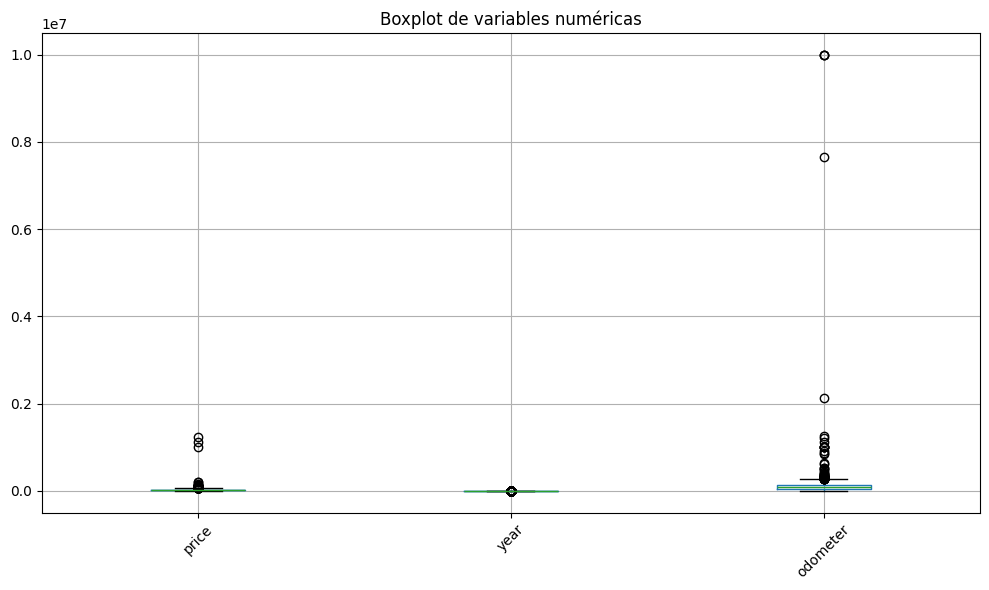

In [229]:
# Crear boxplot para una revision mas sencilla a los datos numericos.
df.boxplot(figsize=(10, 6)
                , grid=True)
plt.title('Boxplot de variables numéricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se identifica que en odometer y price hay varios valores fuera de rango, por lo que se revisara la data para los odometer ordenados de forma desc

In [230]:
df.sort_values(by='odometer', ascending=False).head(20)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
1398,florence,3200,2004.0,honda,accord,good,6 cylinders,gas,9999999.0,clean,automatic,fwd,sedan,white,sc
4520,st cloud,3500,1939.0,ford,International 1.5 ton,fair,8 cylinders,gas,9999999.0,missing,manual,rwd,truck,green,mn
4663,akron / canton,15000,1985.0,chevrolet,s10,good,8 cylinders,gas,9999999.0,clean,automatic,rwd,pickup,blue,oh
4375,show low,1550,1988.0,chevrolet,express van,good,8 cylinders,gas,7654321.0,clean,automatic,rwd,van,white,az
319,denver,12000,2003.0,ford,f-350 super duty,good,8 cylinders,diesel,2120691.0,clean,automatic,4wd,truck,white,co
1467,evansville,39995,2007.0,ford,Setra S417,good,6 cylinders,diesel,1253579.0,clean,automatic,4wd,bus,white,in
4777,manhattan,9500,1994.0,ford,Freightliner Columbia 112,good,6 cylinders,diesel,1200000.0,clean,manual,4wd,sedan,white,ks
2019,dallas / fort worth,18000,1961.0,ford,galaxie,good,8 cylinders,gas,1111111.0,clean,manual,rwd,coupe,green,tx
1149,east idaho,3995,1962.0,ford,studebaker champ,fair,8 cylinders,gas,1000100.0,clean,manual,rwd,pickup,orange,id
1162,bozeman,12345,2022.0,chevrolet,silverado,fair,12 cylinders,gas,1000000.0,clean,other,4wd,truck,purple,mt


In [231]:
df.sort_values(by='price', ascending=False).head(20)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
300,terre haute,1234567,2006.0,jeep,wrangler,like new,6 cylinders,gas,123456.0,clean,automatic,4wd,SUV,custom,in
153,southwest MS,1111111,1970.0,dodge,challenger,fair,8 cylinders,gas,42000.0,clean,automatic,rwd,coupe,blue,ms
3435,delaware,1000000,2022.0,ford,Any make any model,good,6 cylinders,other,364747.0,clean,other,4wd,sedan,white,de
531,daytona beach,209999,2015.0,ford,Lamborghini Huracan,excellent,10 cylinders,gas,11828.0,clean,other,4wd,coupe,green,fl
766,daytona beach,199999,2017.0,mercedes-benz,g-class,excellent,8 cylinders,gas,15189.0,clean,other,4wd,wagon,yellow,fl
4592,anchorage / mat-su,145000,2014.0,ford,freightliner m2 106,like new,6 cylinders,diesel,17094.0,clean,automatic,4wd,truck,black,ak
4722,phoenix,135000,1967.0,chevrolet,camaro ss,excellent,8 cylinders,gas,3000.0,clean,manual,rwd,coupe,silver,az
1570,las vegas,129888,1993.0,rover,defender 110,good,8 cylinders,gas,750.0,clean,manual,4wd,SUV,black,nv
4179,green bay,122420,2017.0,audi,f-150,good,10 cylinders,other,16613.0,clean,automatic,fwd,other,white,wi
4250,north jersey,122420,2017.0,audi,f-150,good,10 cylinders,other,16613.0,clean,automatic,fwd,other,white,nj


In [232]:
# Obtiene indice de los precios mayor a 100000 para borrar los
outliers_price = df[(df['price'] > 100000) | (df['price'] == 0)].index
df.drop(index=outliers_price, inplace=True)


# Obtiene indeice de los precios mayor a 9999990 para borrar los
outliers_odometer = df[(df['odometer'] > 100000) | (df['odometer'] == 0)].index
df.drop(index=outliers_odometer, inplace=True)


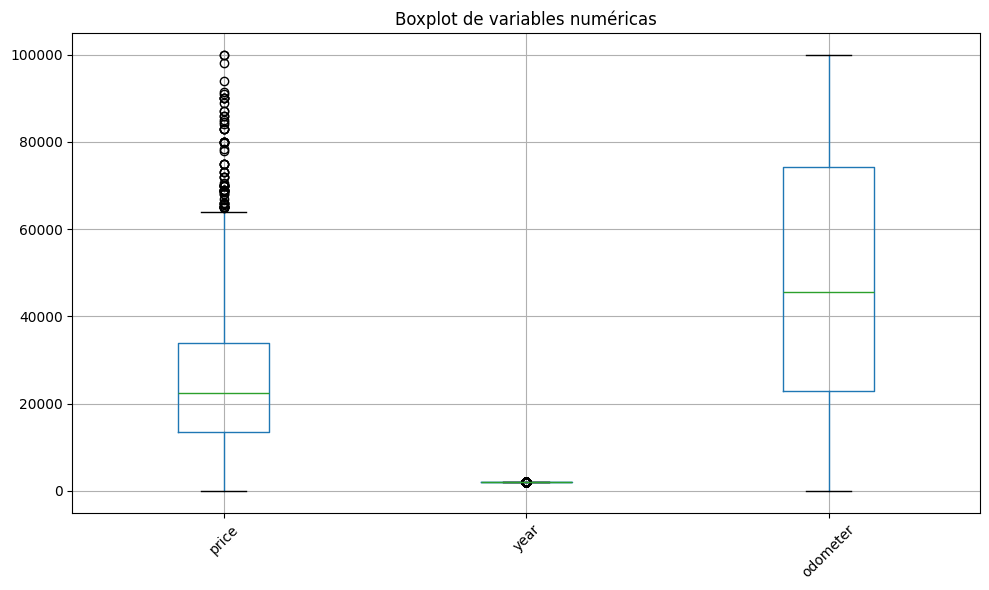

In [233]:
# Crear boxplot para una revision mas sencilla a los datos numericos.
df.boxplot(figsize=(10, 6)
                , grid=True)
plt.title('Boxplot de variables numéricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exploracion de datos.

In [234]:
# Creamos el grafico para ver la cantidad de autos por type
fig = px.pie(df,
             names="type",
             title="Porcentaje por Tipo de Auto",
             labels={"type": "Tipo"},# remobra etiquetas
             )
fig.update_layout(title_font_size=18)
fig.show()

La mayor cantidad de vehiculos puestos en venta son modelos sedan.

In [235]:
# Se crea un histograma para visualizar el tipo de combustible
fig = px.histogram(df,
             x="fuel",
             title="Distribución por Tipo de Combustible.",
             labels={"fuel":"Tipo de Combustible"},# remobra etiquetas
             color_discrete_sequence=['skyblue']
             )
fig.update_layout(title_font_size=18)
fig.show()

En su mayoria los vehiculos son a combustion por gasolina, y en un volumen bajo pero existente estan tipos de combustion hibrida y electrica, lo cual siguire que hay un porcentaje bajo de vehiculos mas modernos.

In [236]:
# Creamos el grafico de caja para ver la distribucion de Tipo de Transmicion por año.
fig = px.box(df,
             x="transmission",
             y="year",
             title="Promedio de Tipos de Transmision por Año.",
             labels={"year":"Año","transmission": "Transmision"},# remobra etiquetas
             color="transmission" # se indica que valor diferenciara por color
             )
fig.update_layout(title_font_size=18)
fig.show()

Se identifica que la transmision manual es la que tiene mayor presencia a lo largo de los años de los vehiculos, y que los de tipo automatica han tenido un crecimiento en años mas recientes.

In [237]:
# Se hace un grafico de dispersion / burbuja para revisar la distribucion de manufacturer y precio segun el tipo
fig = px.scatter(
    df,
    x="odometer",
    y="price",
    color="manufacturer", # que dato se usara para diferenciar por colores
   # size="monthlycharges", # que determina el tamaño del simbolo
   # symbol="paymentmethod", # que dato se usara para diferenciar por simbolo
    title="Relacion entre odometro y precio",
    hover_data=["manufacturer"], # informacion que se mostrara al pasar el cursor
    labels={"manufacturer":"Marca",
            "odometer":"Odometro",
            "price":"Precio"
            },# remobra etiquetas
)
fig.update_layout(title_font_size=18)
fig.show()

Se ve mucha dispersion en los datos, no todos los autos con mas kilometraje son mas economicos.

# Preprocesamiento

# 1. Dividir en X (features) y y (target).

In [238]:
X = df.drop(columns=["price"]) # Caracteristicas.
y = df["price"] # Objetivo

# 2. Dividir en train y test.

In [239]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, # Caracteristicas.
                                                    y, # Objetivo.
                                                    test_size=0.2,  # Porcentaje del dataset para pruebas.
                                                    random_state=42, # Controla la aleatoriedad.
                                                    shuffle= True  # Mezclar los datos antes de dividir.
                                                    )

In [240]:
# Dividir features.
num_cols = X.select_dtypes(include=["float64", "int"]).columns
nom_cols = X.select_dtypes(include=["object"]).columns

# Modelo.

# Regresion Lineal

In [241]:
preprocessor_rl = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), nom_cols)
])

In [242]:
pipeline_rl = Pipeline([
    ("preprocessing", preprocessor_rl),
    ("regressor", LinearRegression())
])


In [243]:
# Entrenamiento
pipeline_rl.fit(X_train, y_train)
y_pred_rl = pipeline_rl.predict(X_test)

mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred_rl)


# Random Forest

In [244]:
preprocessor_rf = ColumnTransformer([
    ("num","passthrough", num_cols), # no es necesario escalar numericas
    ("cat", OneHotEncoder(handle_unknown="ignore"), nom_cols)
])

In [245]:
pipeline_rf = Pipeline([
    ("preprocessing", preprocessor_rf),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [246]:
# Entrenamiento
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


# Comparacion.

In [247]:
# Crear lista con los resultados.
resultados = pd.DataFrame({
    "modelo": ["Regresion Lineal", "Random Forest"],
    "mse": [mse_rl, mse_rf],
    "rmse":[rmse_rl, rmse_rf],
    "r2": [r2_rl, r2_rf]
})


In [248]:
resultados

,modelo,mse,rmse,r2
0,Regresion Lineal,3.419329e+08,18491.428319,-0.511270
1,Random Forest,1.112305e+08,10546.587529,0.508385


# Modelo Mejorado.

# Random Forest.

In [249]:
preprocessor_rf_2 = ColumnTransformer([
    ("num","passthrough", num_cols), # no es necesario escalar numericas
    ("cat", OneHotEncoder(handle_unknown="ignore"), nom_cols)
])

In [250]:
pipeline_rf_2 = Pipeline([
    ("preprocessing", preprocessor_rf_2),
    ("regressor", RandomForestRegressor(n_estimators=200, max_depth=25, random_state=42))
])


In [252]:
# Optimizacion de hiperparametros.
forest_params = {
    "regressor__n_estimators": [50, 100, 200], # El nombre debe coincidir con el nombre del modelo.
    'regressor__max_depth': [10, 20, None]
}

forest_grid = GridSearchCV(pipeline_rf_2, forest_params, cv=3, scoring="r2")
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['year', 'odometer'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(max_depth=25,
                                                              n_estimators=200,
                                                              random_state=42))]),
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [253]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)

print("Forest Regressor")
print("Mejores parámetros:", forest_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_forest))

Forest Regressor
Mejores parámetros: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
R²: 0.5076995393600214


cambiar el estimators a 200 y max_depth  no hace una gran diferencia por lo que se mantiene el modelo con valores iniciales